In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with sqlite3.connect("../laliga.sqlite") as con:
    df=pd.read_sql_query("SELECT * FROM Matches",con)
    dr=pd.read_sql_query("SELECT * FROM Predictions",con)

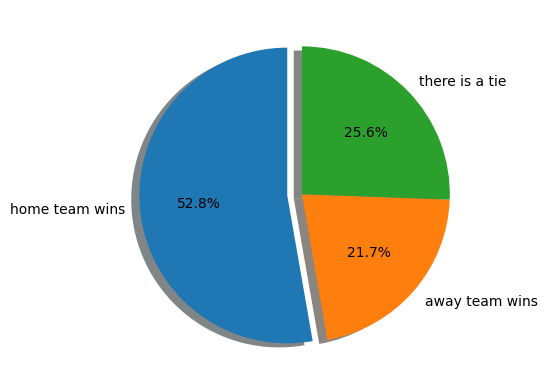

In [3]:
df["score_home_team"] = df["score"].str.split(":").str[0].astype(float)
df["score_away_team"] = df["score"].str.split(":").str[1].astype(float)

home_wins = (df['score_home_team'] > df['score_away_team']).sum()
away_wins = (df['score_home_team'] < df['score_away_team']).sum()
ties = (df['score_home_team'] == df['score_away_team']).sum()

sizes = [home_wins, away_wins, ties]
labels = ['home team wins', 'away team wins', 'there is a tie']
explode = (0.1, 0, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
plt.show()


#fig, ax = plt.subplots()
#ax.pie(sizes, labels=labels)
#plt.show()


As can be seen above, the home team is more likely to win.

In [4]:
df['score_difference']=df['score_home_team']-df['score_away_team']